In [43]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
neg, pos = np.bincount(data['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



In [37]:
print ("Fraud")
print (data.Amount[data.Class == 1].describe())
print ()
print ("Normal")
print (data.Amount[data.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


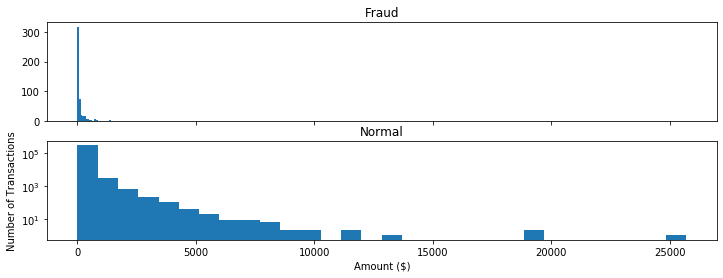

In [38]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(data.Amount[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Amount[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [41]:
#Select only the anonymized features.
v_features = data.iloc[:,1:29].columns

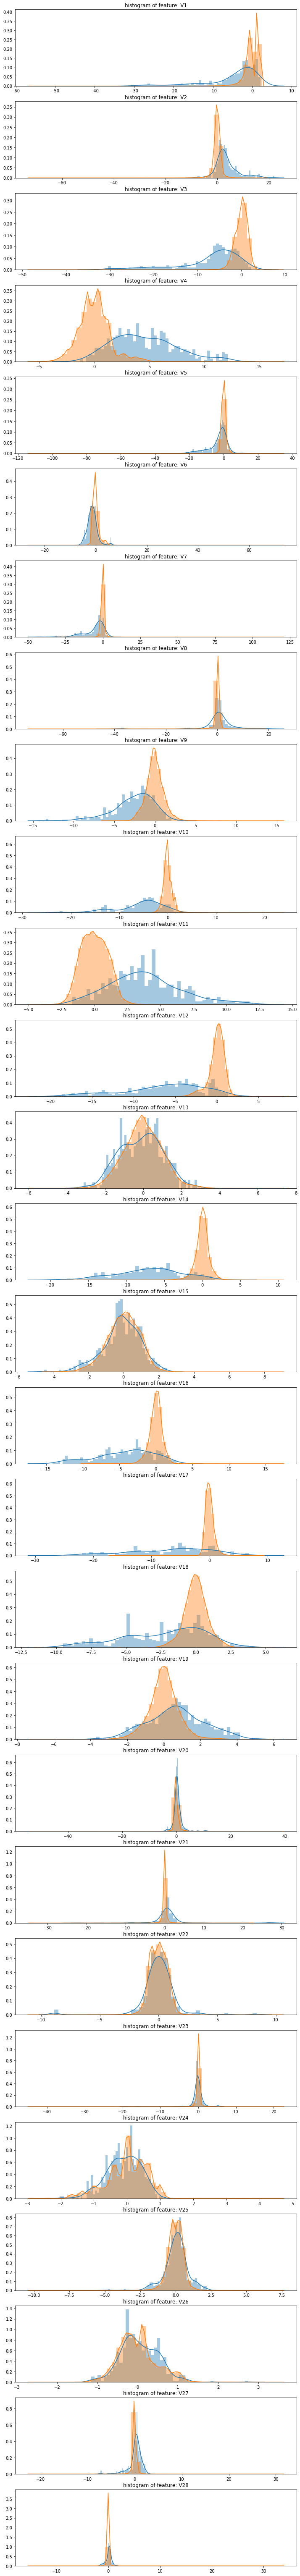

In [46]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50)
    sns.distplot(data[cn][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [49]:
corr = data.corr()

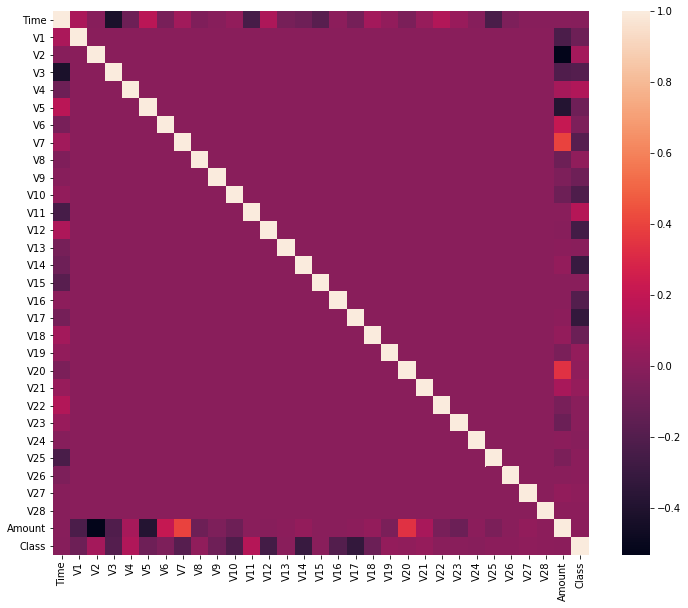

In [61]:
plt.figure(figsize = (12,10))
sns.heatmap(corr)

In [ ]:
#data = data.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis = 1)

In [7]:
cleaned_data = data.copy()

# You don't want the `Time` column.
cleaned_data.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps=0.001 # 0 => 0.1¢
cleaned_data['Log Ammount'] = np.log(cleaned_data.pop('Amount')+eps)

In [8]:
# Use a utility from sklearn to split and shuffle our dataset.
train_data, test_data = train_test_split(cleaned_data, test_size=0.2)
train_data, val_data = train_test_split(train_data, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_data.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_data.pop('Class'))
test_labels = np.array(test_data.pop('Class'))

train_features = np.array(train_data)
val_features = np.array(val_data)
test_features = np.array(test_data)

In [9]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


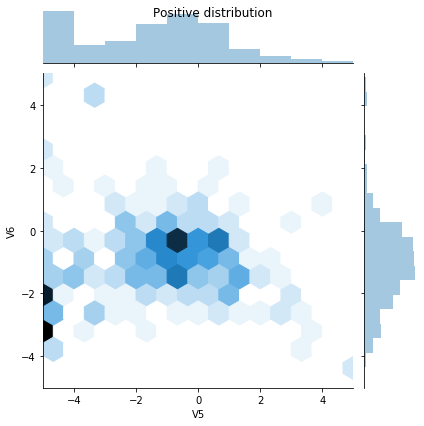

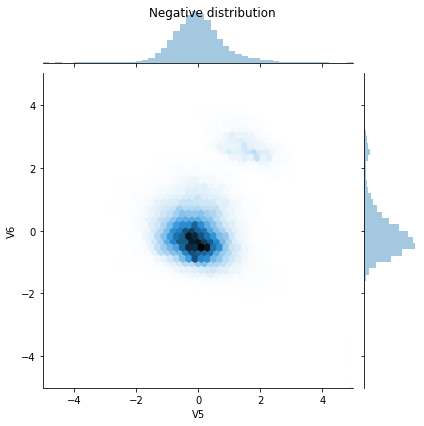

In [11]:
pos_data = pd.DataFrame(train_features[ bool_train_labels], columns = train_data.columns)
neg_data = pd.DataFrame(train_features[~bool_train_labels], columns = train_data.columns)

sns.jointplot(pos_data['V5'], pos_data['V6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_data['V5'], neg_data['V6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
_ = plt.suptitle("Negative distribution")

In [12]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias),
        ])

    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)

    return model

False negatives and false positives are samples that were incorrectly classified <br>
True negatives and true positives are samples that were correctly classified <br>
Accuracy is the percentage of examples correctly classified = $\frac{\text{true samples}}{\text{total samples}}$ <br>
Precision is the percentage of predicted positives that were correctly classified = $\frac{\text{true positives}}{\text{true positives} + \text{false positives}}$ <br>
Recall is the percentage of actual positives that were correctly classified = $\frac{\text{true positives}}{\text{true positives} + \text{false negatives}}$ <br>
AUC refers to the Area Under the Curve of a Receiver Operating Characteristic curve (ROC-AUC). This metric is equal to the probability that a classifier will rank a random positive sample higher than than a random negative sample.

In [13]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.predict(train_features[:10])

array([[0.6632549 ],
       [0.35054865],
       [0.7613626 ],
       [0.6452506 ],
       [0.6148342 ],
       [0.61297184],
       [0.59009236],
       [0.33360508],
       [0.6405734 ],
       [0.78849083]], dtype=float32)

In [15]:
model = make_model()
#model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
#    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=1)

Train on 182276 samples, validate on 45569 samples
Epoch 1/20
182276/182276 [==============================] - 52s 285us/sample - loss: 0.0574 - tp: 184.0000 - fp: 2573.0000 - tn: 179392.0000 - fn: 127.0000 - accuracy: 0.9852 - precision: 0.0667 - recall: 0.5916 - auc: 0.8754 - val_loss: 0.0028 - val_tp: 60.0000 - val_fp: 8.0000 - val_tn: 45488.0000 - val_fn: 13.0000 - val_accuracy: 0.9995 - val_precision: 0.8824 - val_recall: 0.8219 - val_auc: 0.9451
Epoch 2/20
182276/182276 [==============================] - 47s 257us/sample - loss: 0.0061 - tp: 197.0000 - fp: 34.0000 - tn: 181931.0000 - fn: 114.0000 - accuracy: 0.9992 - precision: 0.8528 - recall: 0.6334 - auc: 0.9235 - val_loss: 0.0025 - val_tp: 62.0000 - val_fp: 7.0000 - val_tn: 45489.0000 - val_fn: 11.0000 - val_accuracy: 0.9996 - val_precision: 0.8986 - val_recall: 0.8493 - val_auc: 0.9451
Epoch 3/20
182276/182276 [==============================] - 47s 260us/sample - loss: 0.0048 - tp: 189.0000 - fp: 30.0000 - tn: 181935.0000 - 

In [24]:
def plot_loss(history, label, n):
    plt.figure(figsize=(12,8))
  # Use a log scale to show the wide range of values.
    plt.semilogy(history.epoch,  history.history['loss'], color='r', label='Train '+label)
    plt.semilogy(history.epoch,  history.history['val_loss'], color='b', label='Val '+label,
          linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
  
    plt.legend()

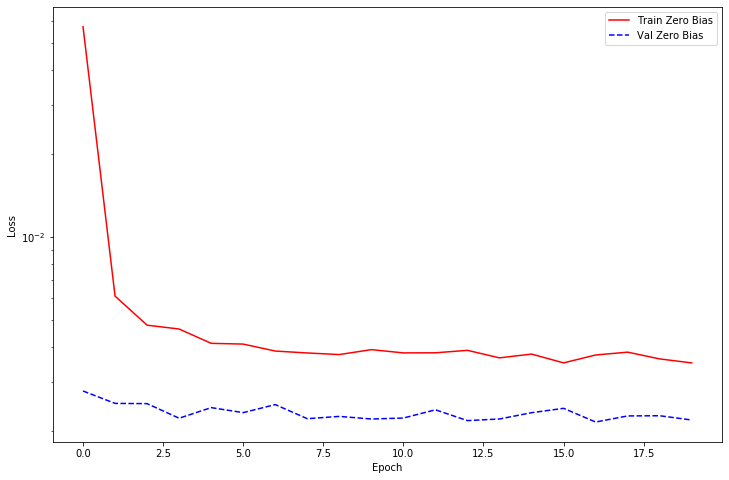

In [25]:
plot_loss(zero_bias_history, "Zero Bias", 0)

In [30]:
train_predictions_baseline = model.predict(train_features)
test_predictions_baseline = model.predict(test_features)

In [28]:
def plot_cm(labels, predictions, p=0.5):
      cm = confusion_matrix(labels, predictions > p)
      plt.figure(figsize=(5,5))
      sns.heatmap(cm, annot=True, fmt="d")
      plt.title('Confusion matrix @{:.2f}'.format(p))
      plt.ylabel('Actual label')
      plt.xlabel('Predicted label')

      print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
      print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
      print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
      print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
      print('Total Fraudulent Transactions: ', np.sum(cm[1]))

56962/56962 [==============================] - 10s 178us/sample - loss: 0.0032 - tp: 77.0000 - fp: 6.0000 - tn: 56848.0000 - fn: 31.0000 - accuracy: 0.9994 - precision: 0.9277 - recall: 0.7130 - auc: 0.9349
loss :  0.0031734416610220296
tp :  77.0
fp :  6.0
tn :  56848.0
fn :  31.0
accuracy :  0.9993504
precision :  0.92771083
recall :  0.712963
auc :  0.9348683

Legitimate Transactions Detected (True Negatives):  56848
Legitimate Transactions Incorrectly Detected (False Positives):  6
Fraudulent Transactions Missed (False Negatives):  31
Fraudulent Transactions Detected (True Positives):  77
Total Fraudulent Transactions:  108


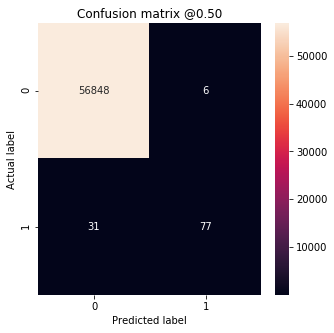

In [31]:
baseline_results = model.evaluate(test_features, test_labels, verbose=1)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [32]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

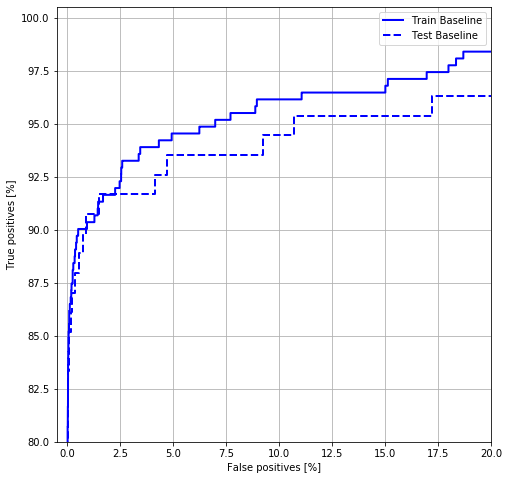

In [62]:
plt.figure(figsize=(12, 8))
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color='b')
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color='b', linestyle='--')
plt.legend(loc='best')